In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy import create_engine, inspect, func
from sqlalchemy.orm import Session
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import Column, Integer, String, Float
from datetime import datetime

In [35]:
# declare auto base
Base = automap_base()

In [36]:
# create engine
engine = create_engine('sqlite:///hawaii.sqlite')

In [37]:
# prepare and reflect classes, view keys
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'stations']

In [38]:
# create objects to hold classes
Measurements = Base.classes.measurements
Stations = Base.classes.stations

In [39]:
# create session
session = Session(engine)

In [110]:
# Precipitation Analysis
# run query and write to dataframe
prcp_L12M = session.query(Measurements.date, Measurements.prcp).order_by(Measurements.date.asc()).\
filter(Measurements.date >= '2016-08-23')

prcp_L12M_df = pd.read_sql_query(prcp_L12M.statement, engine, index_col ='date')
prcp_L12M_df.head(20)
prcp_L12M_df.columns = ['Precipitation']
prcp_L12M_df.head(20)

,Precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28


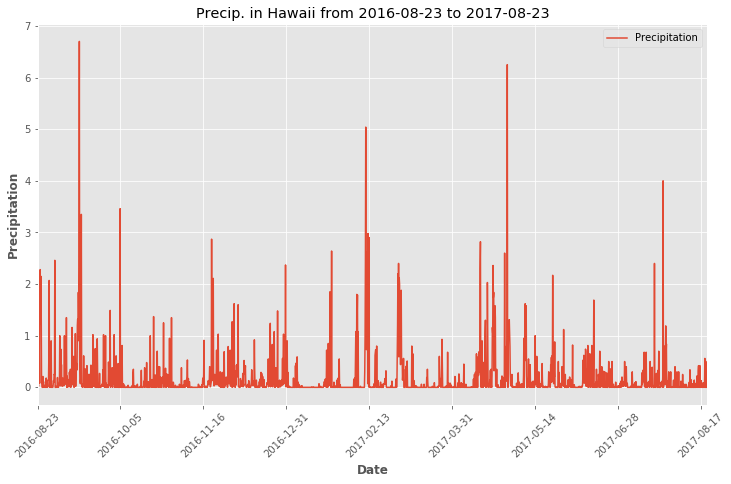

In [112]:
# Precipitation Analysis
# plot results
plt.style.use('ggplot')
prcp_L12M_df.plot(figsize=(12,7), rot=45, legend=True)
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Precipitation', fontweight='bold')
plt.title(f'Precip. in Hawaii from {prcp_L12M_df.first_valid_index()} to {prcp_L12M_df.last_valid_index()}')
plt.show()

In [114]:
# Precipitation Analysis
# summary stats
prcp_L12M_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [115]:
# Station Analysis
# query total # of stations
station_count = session.query(Stations.station).group_by(Stations.station).count()
station_count

9

In [135]:
# Station Analysis
# Station and observation counts listed in descending order
station_obs_query = session.query(Measurements.station, func.count(Measurements.tobs)).group_by(Measurements.station).order_by(func.count(Measurements.tobs).desc())
for record in station_obs_query:
    print(record)

('USC00519281', 2772)
('USC00513117', 2696)
('USC00519397', 2685)
('USC00519523', 2572)
('USC00516128', 2484)
('USC00514830', 1937)
('USC00511918', 1932)
('USC00517948', 683)
('USC00518838', 342)


In [136]:
# Station Analysis
# Station w/ higher observations
station_max_obs = session.query(Measurements.station, func.count(Measurements.tobs)).group_by(Measurements.station).order_by(func.count(Measurements.tobs).desc()).first()
print(station_max_obs)

('USC00519281', 2772)


In [141]:
# find station w/ most observations in past 12 months
station_max_obs_L12M = session.query(Measurements.station, func.count(Measurements.tobs)).\
filter(Measurements.date >= '2016-08-23').group_by(Measurements.station).order_by(func.count(Measurements.tobs).desc()).first()
print(station_max_obs_L12M)
station_max_obs = station_max_obs_L12M[0]

('USC00519397', 359)


In [160]:
station_tobs_L12M_query = session.query(Measurements.date, Measurements.tobs).order_by(Measurements.date.asc()).\
filter(Measurements.date >= '2016-08-23', Measurements.station == station_max_obs)
for record in station_tobs_L12M_query:
    print(record)

('2016-08-23', 81)
('2016-08-24', 79)
('2016-08-25', 80)
('2016-08-26', 79)
('2016-08-27', 77)
('2016-08-28', 78)
('2016-08-29', 78)
('2016-08-30', 79)
('2016-08-31', 80)
('2016-09-01', 81)
('2016-09-02', 80)
('2016-09-03', 79)
('2016-09-04', 75)
('2016-09-07', 76)
('2016-09-08', 80)
('2016-09-09', 79)
('2016-09-10', 78)
('2016-09-11', 76)
('2016-09-12', 78)
('2016-09-13', 78)
('2016-09-14', 75)
('2016-09-15', 79)
('2016-09-16', 80)
('2016-09-17', 79)
('2016-09-18', 81)
('2016-09-19', 77)
('2016-09-20', 77)
('2016-09-21', 78)
('2016-09-22', 76)
('2016-09-23', 82)
('2016-09-24', 81)
('2016-09-25', 78)
('2016-09-26', 80)
('2016-09-27', 80)
('2016-09-28', 79)
('2016-09-29', 80)
('2016-09-30', 80)
('2016-10-01', 80)
('2016-10-02', 79)
('2016-10-03', 79)
('2016-10-04', 79)
('2016-10-05', 80)
('2016-10-06', 80)
('2016-10-07', 79)
('2016-10-08', 78)
('2016-10-09', 76)
('2016-10-10', 75)
('2016-10-11', 80)
('2016-10-12', 80)
('2016-10-13', 79)
('2016-10-14', 80)
('2016-10-15', 79)
('2016-10-16

In [161]:
station_tobs_L12M_df = pd.read_sql_query(station_tobs_L12M_query.statement, engine, index_col ='date')
station_tobs_L12M_df

,tobs
date,
2016-08-23,81
2016-08-24,79
2016-08-25,80
2016-08-26,79
2016-08-27,77
2016-08-28,78
2016-08-29,78
2016-08-30,79
2016-08-31,80


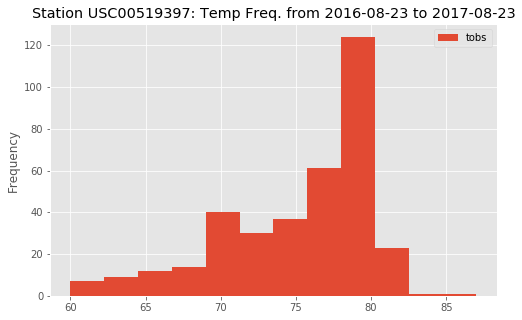

In [174]:
plt.style.use('ggplot')
station_tobs_L12M_df.plot.hist(figsize = (8,5), bins=12)
plt.title(f'Station {station_max_obs}: Temp Freq. from {station_tobs_L12M_df.first_valid_index()} '
         f'to {station_tobs_L12M_df.last_valid_index()}')
plt.show()